# MOD 3 PROJECT OFFICE HOURS 2


- 04/21/20

## QUESTIONS 

- Class imblanace issues and ways to improve performance 
    - `train_test_split(stratify=y)`
- Using Stratified gridsearch:
    - `GridSearchCV(cv = StratifiedKFold())`
    - [Stratified KFold](thttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold)
    
- Random states and when to keep them consistent
    - can use a random with SMOTE, train_test_split

- XGBoost issues (notebook split)
- train_test_split:
    - Don't need to do fresh for each model


## Learning Objectives

- Discuss how to make professional quality Markdown cells/notes
- Discuss how to use `catboost` for datasets that are heavy skewed towards categorical features

# Markdown

- [Blog post](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)
- [Our Cheat Sheets Folder](https://drive.google.com/open?id=1wf2cVPypyKCPHObyVjz83bMRyhXasEP8)

## Catboost

- https://catboost.ai/
- https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb/


# Back to Our Iowa Prisoners

In [1]:
from IPython.display import clear_output
!pip install -U fsds_100719
clear_output()
from fsds_100719.imports import *


fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from fsds_100719.imports import *

### previous functions

In [3]:
# fs.quick

In [4]:
fs.quick_refs.ts_date_str_formatting()

CODE,MEANING,EXAMPLE
%Y,Year with century as a decimal number.,2001
%y,Year without century as a zero-padded decimal number.,01
%m,Month as a zero-padded decimal number.,02
%B,Month as locale’s full name.,February
%b,Month as locale’s abbreviated name.,Feb
%d,Day of the month as a zero-padded decimal number.,03
%A,Weekday as locale’s full name.,Saturday
%a,Weekday as locale’s abbreviated name.,Sat
%H,Hour (24-hour clock) as a zero-padded decimal number.,16
%I,Hour (12-hour clock) as a zero-padded decimal number.,04


In [5]:
# timer.created_at.isoformat(sep=' ', timespec='milliseconds')

In [6]:
## a timer to record how long a process takes
class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M:%S %p", 
                 start_timer=True,str_width=20,verbose=1):
        import tzlocal
        self._verbose = verbose

        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        self._str_width = str_width
        
        self.created_at = self.get_time()# get time'

        
        self._log = []
#         self.log(f"[i] Timer created at \t{self.created_at.strftime(self.fmt):>{self._str_width}}",
#                 print_=False)
       
        if start_timer:
            self.start()
        
        
    def log(self,msg='',print_= None):
        if print_ is None:
            print_ = self._verbose         
        if print_>0:
            print(msg)
        self._log.append(msg)
        
        
    def _fmt_time(self,time_to_fmt):
        time_str = f"{time_to_fmt.strftime(self.fmt):>{self._str_width}}"
        return time_str
        
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.started_at = time
        msg = f"[i] Timer started at \t{self._fmt_time(self.started_at)}" #{self.started_at.strftime(self.fmt):>{self._str_width}}"
        self.log(msg,print_=None)#_log.append(msg)


    
    ## def stop
    def stop(self):
        time = self.get_time()
        self.ended_at = time
        self.duration = self.ended_at - self.started_at
        
    
        msg1 = f"[i] Timer ended at \t{self.ended_at.strftime(self.fmt):>{self._str_width}}"
        msg2 = f"\t\t\t- Total time = {self.duration}"

        if self._verbose==2:
            print_override=False
        else:
            print_override=True
                
        self.log(msg1,print_=print_override)#_log.append(msg1)

#         if self._verbose>1:
#             print('---'*20)
            

        self.log(msg2,print_=print_override)#,print_=True)
        if self._verbose==2:
            print(self.summary())
#
    def summary(self):
        dashes= '---'*20
#         print()
        
    
        summary = self._log.copy()
        
        summary =['\n',dashes,'\tTIMER LOG',dashes,
                  *summary,dashes]
        
#         summary.append()
#         summary.append(dashes)
        
#         if self._verbose>1:
#             summary.append(dashes)
        return '\n'.join(summary)
    
    
    def __repr__(self):
        return self.summary()

In [7]:
import time
timer = Timer(verbose=1)#str_width=40)

time.sleep(1)

timer.stop()
# type(timer)
# timer.log('cheese',False)
# timer

[i] Timer started at 	04/21/20 - 08:51:05 PM
[i] Timer ended at 	04/21/20 - 08:51:06 PM
			- Total time = 0:00:01.002512


In [8]:
timer



------------------------------------------------------------
	TIMER LOG
------------------------------------------------------------
[i] Timer started at 	04/21/20 - 08:51:05 PM
[i] Timer ended at 	04/21/20 - 08:51:06 PM
			- Total time = 0:00:01.002512
------------------------------------------------------------

In [9]:
# mpl.

True


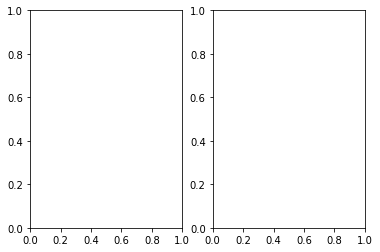

In [10]:
fig,ax=plt.subplots(ncols=2)

if isinstance(ax,np.ndarray):
    print('True')

In [11]:
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance

## Write a fucntion to evalute the model
import sklearn.metrics as metrics

def evaluate_model(y_true, y_pred,X_true,clf,cm_kws=dict(cmap="Greens",
                                  normalize='true'),figsize=(10,4),plot_roc_auc=True):
    
    ## Classification Report / Scores 
    print(metrics.classification_report(y_true,y_pred))

    if plot_roc_auc:
        num_cols=2
    else:
        num_cols=1
        
    fig, ax = plt.subplots(figsize=figsize,ncols=num_cols)
    
    if not isinstance(ax,np.ndarray):
        ax=[ax]
    metrics.plot_confusion_matrix(clf,X_true,y_true,ax=ax[0],**cm_kws)
    ax[0].set(title='Confusion Matrix')
    
    if plot_roc_auc:
        try:
            y_score = clf.predict_proba(X_true)[:,1]

            fpr,tpr,thresh = metrics.roc_curve(y_true,y_score)
            # print(f"ROC-area-under-the-curve= {}")
            roc_auc = round(metrics.auc(fpr,tpr),3)
            ax[1].plot(fpr,tpr,color='darkorange',label=f'ROC Curve (AUC={roc_auc})')
            ax[1].plot([0,1],[0,1],ls=':')
            ax[1].legend()
            ax[1].grid()
            ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
                  title='Receiver operating characteristic (ROC) Curve')
            plt.tight_layout()
            plt.show()
        except:
            pass
    try: 
        df_important = plot_importance(clf)
    except:
        df_important = None
    
#     return df_important
## visualize the decision tree
def visualize_tree(tree,feature_names=None,class_names=['0','1'],
                   kws={},save_filename=None,format_='png',save_and_show=False):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)
        if save_and_show:
            display(graph)
        else:
            print(f'[i] Tree saved as {save_filename}.{format_}')
    else:
        display(graph)

#     display(SVG(graph.pipe(format=format_)))#'svg')))

# Obtain

In [12]:
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [13]:
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
race_ethnicity    25990 non-null object
age_released      26017 non-null object
crime_class       26020 non-null object
crime_type        26020 non-null object
crime_subtype     26020 non-null object
release_type      24258 non-null object
super_dist        16439 non-null object
recidivist        26020 non-null object
target_pop        26020 non-null object
sex               26017 non-null object
dtypes: object(10)
memory usage: 2.2+ MB


race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

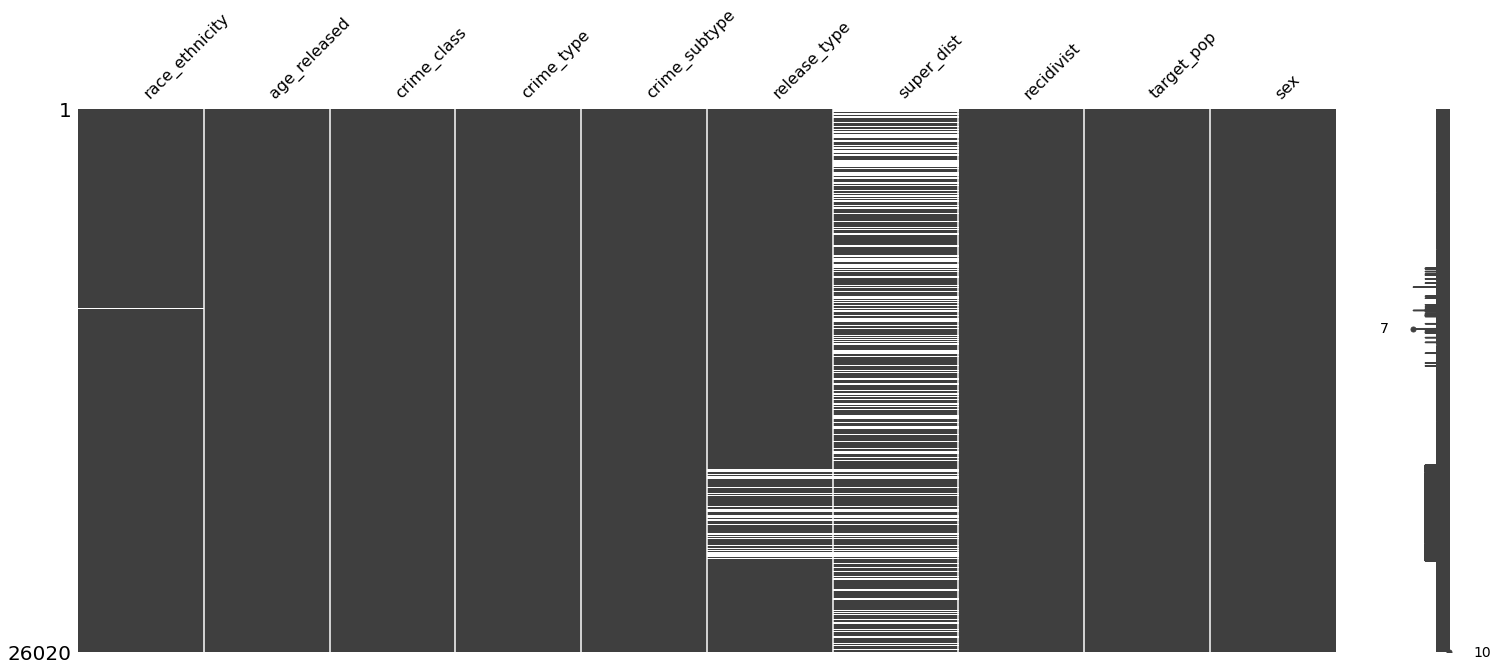

In [14]:
## Check null values
import missingno
missingno.matrix(df)
df.isna().sum()

In [15]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [16]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race_ethnicity, dtype: int64

In [17]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Other Felony (Old Code)                         2
Sexual Predator Community Supervision           2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [18]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

In [19]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [20]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))
age_map

{'Under 25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55 and Older': 4}

In [21]:
df['age_enc'] = df['age_released'].map(age_map)
df['age_enc'].value_counts()

1.0    9554
2.0    6223
0.0    4590
3.0    4347
4.0    1303
Name: age_enc, dtype: int64

In [22]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [23]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts()

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
Name: age_number, dtype: int64

In [24]:
## Drop Nulls 
print(df.isna().sum().divide(len(df))*100)
drop_cols  = [col for col in df.drop(columns=['super_dist','release_type']).columns]
drop_cols

race_ethnicity     0.134512
age_released       0.011530
crime_class        0.076864
crime_type         0.000000
crime_subtype      0.000000
release_type       6.771714
super_dist        36.821676
recidivist         0.000000
target_pop         0.000000
sex                0.011530
age_enc            0.011530
age_number         0.011530
dtype: float64


['race_ethnicity',
 'age_released',
 'crime_class',
 'crime_type',
 'crime_subtype',
 'recidivist',
 'target_pop',
 'sex',
 'age_enc',
 'age_number']

In [25]:
df.dropna(subset=drop_cols, inplace=True)
df.isna().sum()

race_ethnicity       0
age_released         0
crime_class          0
crime_type           0
crime_subtype        0
release_type      1759
super_dist        9539
recidivist           0
target_pop           0
sex                  0
age_enc              0
age_number           0
dtype: int64

In [26]:
df[['super_dist','release_type']] = df[['super_dist','release_type']].fillna('Missing')
df.isna().sum()

race_ethnicity    0
age_released      0
crime_class       0
crime_type        0
crime_subtype     0
release_type      0
super_dist        0
recidivist        0
target_pop        0
sex               0
age_enc           0
age_number        0
dtype: int64

In [27]:
drop_cols = ['age_released']
df = df.drop(columns=drop_cols)

In [28]:
# one_hot_cols = ['race_ethnicity','crime_class
df = pd.get_dummies(df)#,dummy_na=True)
df.head()

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_Missing,recidivist_No,recidivist_Yes,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,1.0,30.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2,2.0,40.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,1.0,30.0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,2.0,40.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [29]:
df.drop('recidivist_No',axis=1,inplace=True)

In [30]:
y = df['recidivist_Yes']
X = df.drop('recidivist_Yes',axis=1)


### Train Test Split

In [31]:
y.value_counts(normalize=True)

0    0.665896
1    0.334104
Name: recidivist_Yes, dtype: float64

## Effect of Stratify

In [32]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,
                                                    random_state=42)#,stratify=y)
display(y_train.value_counts(normalize=False),y_test.value_counts(normalize=False))

0    12074
1     6101
Name: recidivist_Yes, dtype: int64

0    5216
1    2574
Name: recidivist_Yes, dtype: int64

In [33]:
## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,
                                                    random_state=42,stratify=y)
display(y_train.value_counts(normalize=False),y_test.value_counts(normalize=False))

0    12103
1     6072
Name: recidivist_Yes, dtype: int64

0    5187
1    2603
Name: recidivist_Yes, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
display(y_train.value_counts(normalize=False),y_test.value_counts(normalize=False))

Using TensorFlow backend.


1    12103
0    12103
Name: recidivist_Yes, dtype: int64

0    5187
1    2603
Name: recidivist_Yes, dtype: int64

In [35]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy='majority',random_state=42)
# rus

In [36]:
# X_train, y_train = rus.fit_resample(X_train, y_train)
# pd.Series(y_train).value_counts()

In [37]:
# px.scatter_matrix(df, color='recidivist')

In [38]:
X_train

,age_enc,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_6JD,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_Missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male
0,2.0,40.0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,1.0,30.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1.0,30.0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,1.0,30.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0.0,20.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24201,3.0,50.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
24202,1.0,30.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
24203,0.0,20.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
24204,3.0,50.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## RandomForests Revisited

[i] Timer started at 	04/21/20 - 08:51:09 PM
Training score:  0.84
Test score:  0.62


------------------------------------------------------------
	TIMER LOG
------------------------------------------------------------
[i] Timer started at 	04/21/20 - 08:51:09 PM
[i] Timer ended at 	04/21/20 - 08:51:12 PM
			- Total time = 0:00:03.042412
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5187
           1       0.44      0.47      0.45      2603

    accuracy                           0.62      7790
   macro avg       0.58      0.58      0.58      7790
weighted avg       0.63      0.62      0.62      7790



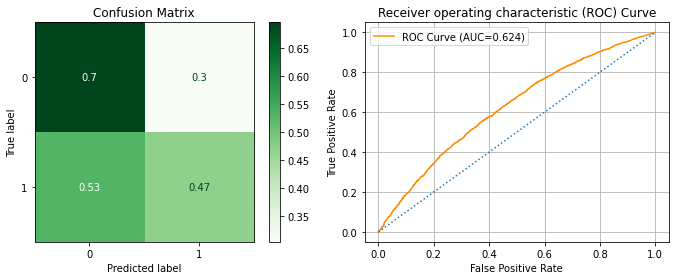

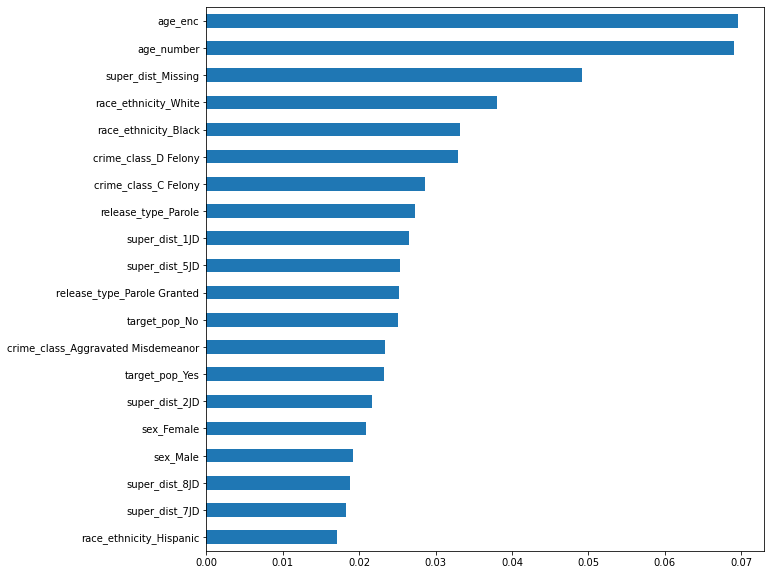

In [39]:
from sklearn.ensemble import RandomForestClassifier
## Fit and Evaluate
timer = Timer(verbose=2)#.start()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print('Training score: ' ,round(clf.score(X_train,y_train),2))
print('Test score: ',round(clf.score(X_test,y_test),2))

y_hat_test = clf.predict(X_test)
timer.stop()

evaluate_model(y_test,y_hat_test,X_test,clf)

[i] Timer started at 	04/21/20 - 08:51:14 PM
Training score:  0.84
Test score:  0.62


------------------------------------------------------------
	TIMER LOG
------------------------------------------------------------
[i] Timer started at 	04/21/20 - 08:51:14 PM
[i] Timer ended at 	04/21/20 - 08:51:17 PM
			- Total time = 0:00:03.695611
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5187
           1       0.44      0.48      0.46      2603

    accuracy                           0.62      7790
   macro avg       0.58      0.58      0.58      7790
weighted avg       0.63      0.62      0.62      7790



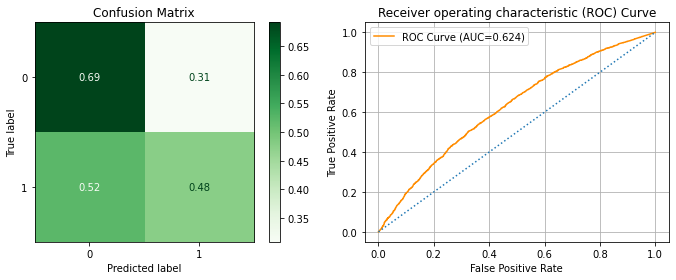

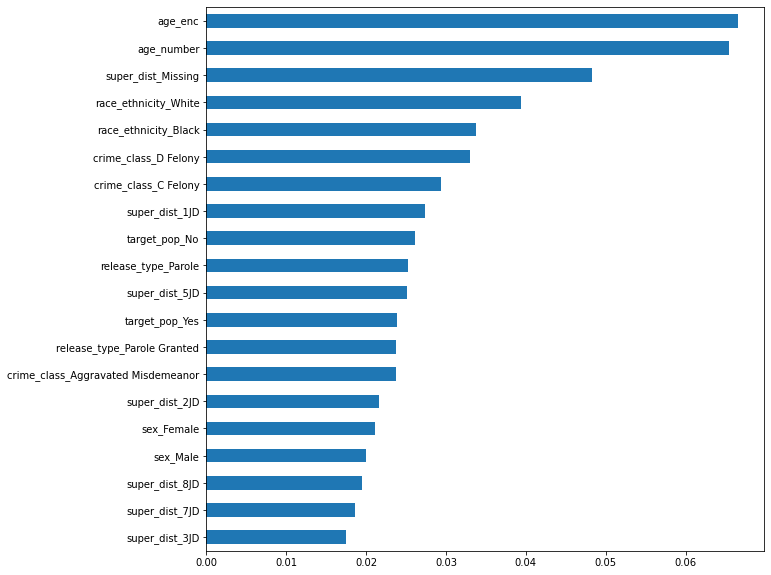

In [40]:
### Class_weight='balanced'
## Fit and Evaluate
timer = Timer(verbose=2)#.start()
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
print('Training score: ' ,round(clf.score(X_train,y_train),2))
print('Test score: ',round(clf.score(X_test,y_test),2))

y_hat_test = clf.predict(X_test)
timer.stop()

evaluate_model(y_test,y_hat_test,X_test,clf)

### catboost

Training score:  0.75
Test score:  0.65


------------------------------------------------------------
	TIMER LOG
------------------------------------------------------------
[i] Timer started at 	04/21/20 - 08:51:14 PM
[i] Timer ended at 	04/21/20 - 08:51:17 PM
			- Total time = 0:00:03.695611
[i] Timer ended at 	04/21/20 - 08:51:28 PM
			- Total time = 0:00:14.166176
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      5187
           1       0.47      0.53      0.50      2603

    accuracy                           0.65      7790
   macro avg       0.61      0.62      0.61      7790
weighted avg       0.66      0.65      0.65      7790



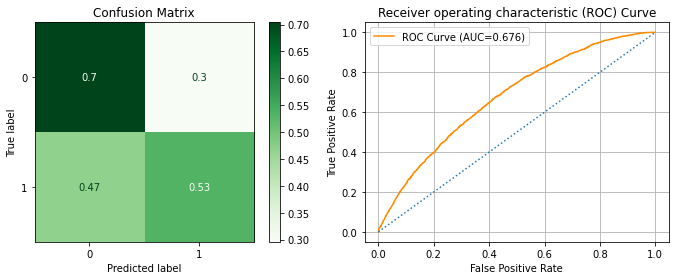

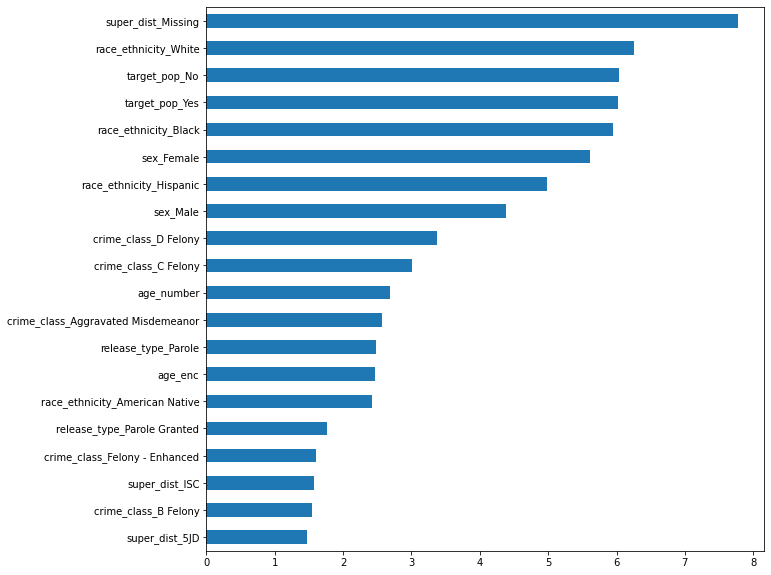

In [41]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X_train,y_train,logging_level='Silent')
print('Training score: ' ,round(clf.score(X_train,y_train),2))
print('Test score: ',round(clf.score(X_test,y_test),2))

y_hat_test = clf.predict(X_test)
timer.stop()

evaluate_model(y_test,y_hat_test,X_test,clf)

## Comparison

In [42]:
# from sklearn.ensemble import RandomForestClassifier
# ## Fit and Evaluate
# timer = Timer(verbose=2)#.start()

# clf = RandomForestClassifier()#class_weight='balanced')
# clf.fit(X_train, y_train)
# print('Training score: ' ,round(clf.score(X_train,y_train),2))
# print('Test score: ',round(clf.score(X_test,y_test),2))

# y_hat_test = clf.predict(X_test)
# timer.stop()

# evaluate_model(y_test,y_hat_test,X_test,clf)


In [43]:
# from xgboost import XGBRFClassifier,XGBClassifier
# ## Fit and Evaluate
# timer = Timer(verbose=2)#.start()

# xgb_rf = XGBRFClassifier()
# xgb_rf.fit(X_train, y_train)
# print('Training score: ' ,round(xgb_rf.score(X_train,y_train),2))
# print('Test score: ',round(xgb_rf.score(X_test,y_test),2))

# y_hat_test = xgb_rf.predict(X_test)
# timer.stop()

# evaluate_model(y_test,y_hat_test,X_test,xgb_rf)


In [44]:
importance = pd.Series(xgb_rf.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
display(importance.head(20))
top_cols = list(importance.head(20).index)
top_cols

NameError: name 'xgb_rf' is not defined

## Support Vector Machines

In [ ]:
import os,glob,sys
folder ='py_files/'
sys.path.append(os.path.abspath(folder))
import mod_5_functions as m5

In [ ]:
# # X_train[top_cols]
# X_train.shape
# X_train = X_train[top_cols]
# X_test = X_test[top_cols]

In [ ]:
# np.logspace(0.01, 10,0.1)
np.logspace(-1,1,3)

In [ ]:
# from sklearn.pre

In [ ]:
from sklearn.svm import SVC,LinearSVC,NuSVC
clf = SVC()
clf.fit(X_train,y_train)
y_hat_test = clf.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,clf)

# Using catboost

- https://catboost.ai/
- https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb/



In [ ]:
# !pip install -U catboost
from catboost import CatBoostClassifier, Pool,cv

In [ ]:
model = CatBoostClassifier()
model.fit(X_train,y_train)